In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
features = data.drop("Class", axis = 1).copy()
label = data["Class"].copy()

In [6]:
positives = len(data[data["Class"] == 1])
total = len(data)
positives * 100 / total

0.1727485630620034

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2, stratify=label, random_state=42
)
decisionTree = DecisionTreeClassifier(random_state=42)
decisionTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

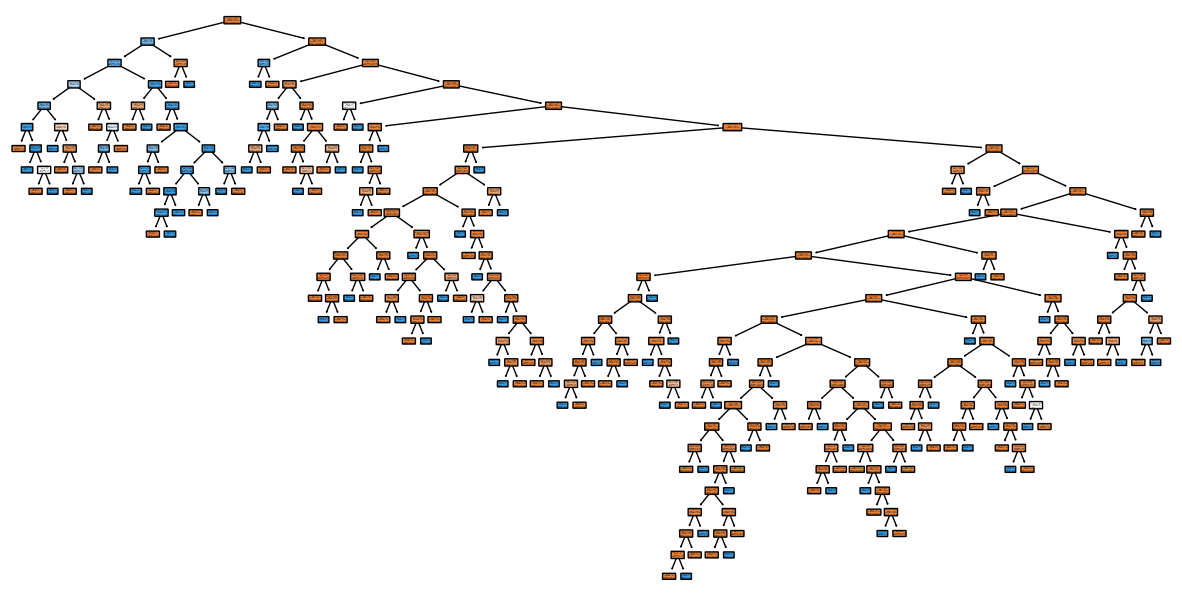

In [8]:
plt.figure(figsize=(15, 7.5))
plot_tree(decisionTree, filled=True,rounded=True,class_names=["NO Fraud", "Fraud"],feature_names=features.columns);

In [9]:
predictions = decisionTree.predict(x_test)

In [10]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



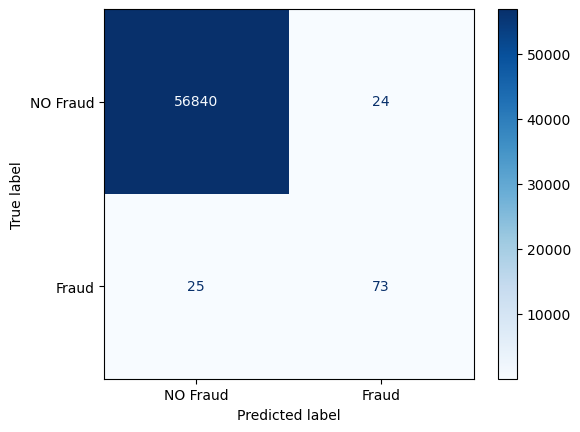

In [11]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO Fraud", "Fraud"])
disp.plot(cmap="Blues", values_format="d")

In [26]:
path = decisionTree.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]
alphas = alphas[::3]

In [27]:
len(alphas)

19

<Axes: xlabel='alpha'>

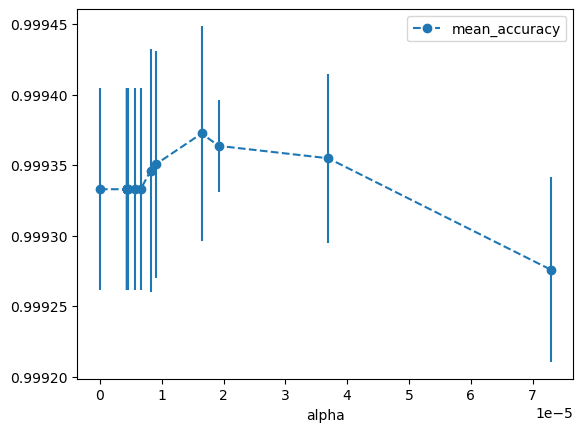

In [28]:
alpha_summary = []

for alpha in alphas:
    temp_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha, max_depth=6)
    scores = cross_val_score(temp_dt, x_train, y_train, cv=3)
    alpha_summary.append([alpha, np.mean(scores), np.std(scores)])

result = pd.DataFrame(alpha_summary, columns=["alpha", "mean_accuracy", "std"])
result.plot(x="alpha",y="mean_accuracy",yerr="std",marker="o",linestyle="--")

In [32]:
best_alpha_row = result.loc[result['mean_accuracy'].idxmax()]
print(best_alpha_row)


alpha            0.000016
mean_accuracy    0.999372
std              0.000076
Name: 15, dtype: float64


In [40]:
best_alpha = best_alpha_row["alpha"]

pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_tree = pruned_tree.fit(x_train, y_train)

In [46]:
predictions2 = pruned_tree.predict(x_test)
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



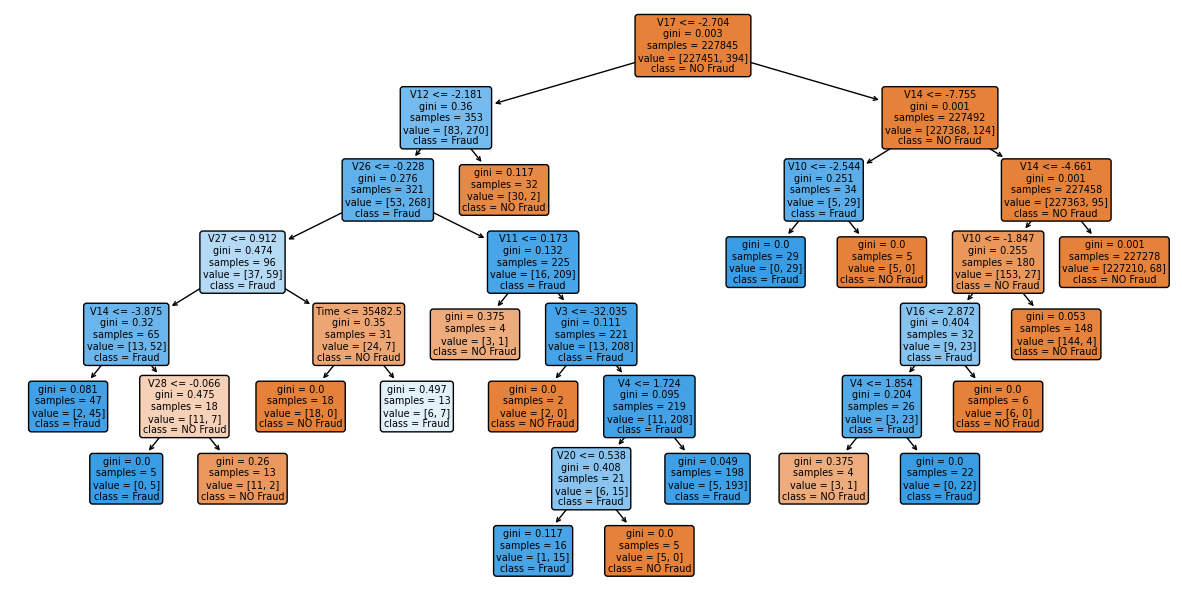

In [48]:
plt.figure(figsize=(15, 7.5))
plot_tree(pruned_tree, filled=True,rounded=True,class_names=["NO Fraud", "Fraud"],feature_names=features.columns);

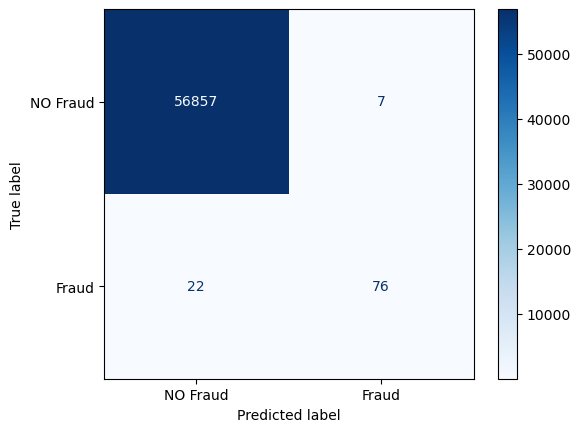

In [50]:
cm = confusion_matrix(y_test, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO Fraud", "Fraud"])
disp.plot(cmap="Blues", values_format="d")